# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [5]:
df.dropna(inplace=True)

In [6]:
df['age'].fillna((df['age'].mean()),inplace=True)

In [7]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

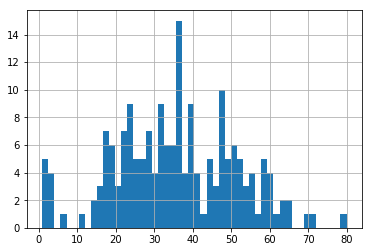

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

pclass  sex   age
1        1    0  38.0
3        1    0  35.0
6        1    1  54.0
10       3    0   4.0
11       1    0  58.0

In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

pclass         sex         age
count  182.000000  182.000000  182.000000
mean     1.192308    0.516484   35.623187
std      0.516411    0.501107   15.671615
min      1.000000    0.000000    0.920000
25%      1.000000    0.000000   24.000000
50%      1.000000    1.000000   36.000000
75%      1.000000    1.000000   47.750000
max      3.000000    1.000000   80.000000

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

***

# Random Forest

[paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilise uncorrelated trees

Random Forest
* Sample both observations and features of training data

Bagging
* Samples only observations at random
* Decision Tree select best feature when splitting a node

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [25]:
rf_clf = RandomForestClassifier(random_state=42)

In [26]:
rf_clf.fit(X_train, y_train)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9387

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        55
           1       0.94      0.97      0.95       108

    accuracy                           0.94       163
   macro avg       0.94      0.92      0.93       163
weighted avg       0.94      0.94      0.94       163


Confusion Matrix: 
 [[ 48   7]
 [  3 105]]

Average Accuracy: 	 0.7831
Accuracy SD: 		 0.0883


In [28]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8947

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.87      0.93        15

    accuracy                           0.89        19
   macro avg       0.83      0.93      0.86        19
weighted avg       0.93      0.89      0.90        19


Confusion Matrix: 
 [[ 4  0]
 [ 2 13]]



## Grid Search

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rf_clf = RandomForestClassifier(random_state=42)

In [32]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [33]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.8s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bo

In [35]:
grid_search.best_score_

0.8220858895705522

In [36]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8712

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        55
           1       0.88      0.94      0.91       108

    accuracy                           0.87       163
   macro avg       0.87      0.84      0.85       163
weighted avg       0.87      0.87      0.87       163


Confusion Matrix: 
 [[ 41  14]
 [  7 101]]

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.2s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.6s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.2s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.7s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Average Accuracy: 	 0.7392
Accuracy SD: 		 0.0965


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.2s finished
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8947

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.87      0.93        15

    accuracy                           0.89        19
   macro avg       0.83      0.93      0.86        19
weighted avg       0.93      0.89      0.90        19


Confusion Matrix: 
 [[ 4  0]
 [ 2 13]]



***

# Extra-Trees (Extremely Randomized Trees) Ensemble

[scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#bagging)

* Random Forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
xt_clf = ExtraTreesClassifier(min_samples_leaf=5,random_state=42)

In [45]:
xt_clf.fit(X_train, y_train)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [46]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.7914

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68        55
           1       0.83      0.86      0.85       108

    accuracy                           0.79       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.79      0.79      0.79       163


Confusion Matrix: 
 [[36 19]
 [15 93]]

Average Accuracy: 	 0.7525
Accuracy SD: 		 0.0803


In [47]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7895

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.92      0.80      0.86        15

    accuracy                           0.79        19
   macro avg       0.71      0.78      0.73        19
weighted avg       0.83      0.79      0.80        19


Confusion Matrix: 
 [[ 3  1]
 [ 3 12]]



# Exercise:

# Run the extra tree classifier with min_samples_leaf=5 and check if it increases or decreases the performance

***